In [1]:
from asim.training.models.sim_agent.smart.smart import SMART
from asim.training.models.sim_agent.smart.smart_config import SmartConfig

In [2]:

config = SmartConfig()
SMART(config)

SMART(
  (encoder): SMARTDecoder(
    (map_encoder): SMARTMapDecoder(
      (type_pt_emb): Embedding(17, 128)
      (polygon_type_emb): Embedding(4, 128)
      (light_pl_emb): Embedding(4, 128)
      (r_pt2pt_emb): FourierEmbedding(
        (freqs): Embedding(3, 64)
        (mlps): ModuleList(
          (0-2): 3 x Sequential(
            (0): Linear(in_features=129, out_features=128, bias=True)
            (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (2): ReLU(inplace=True)
            (3): Linear(in_features=128, out_features=128, bias=True)
          )
        )
        (to_out): Sequential(
          (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=128, out_features=128, bias=True)
        )
      )
      (pt2pt_layers): ModuleList(
        (0-2): 3 x AttentionLayer()
      )
      (token_predict_head): MLPLayer(
        (mlp): Sequential(
          (0): Linear(in_features=128, ou

In [3]:
import pickle

path = "/home/daniel/asim_workspace/asim/asim/training/models/sim_agent/smart/tokens/cluster_frame_5_2048.pkl"

with open(path, "rb") as f:
    data = pickle.load(f)

In [4]:
# dict_keys(['token', 'traj', 'token_all'])
data.keys()

# dict_keys(['veh', 'ped', 'cyc'])
data["token_all"]["veh"].shape

vehicle_tokens = data["token_all"]["veh"]
vehicle_tokens.shape # (2048, 6, 4, 2)

(2048, 6, 4, 2)

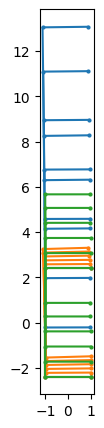

In [5]:
import matplotlib.pyplot as plt

from asim.common.visualization.color.color import  TAB_10
fix, ax = plt.subplots(1,1,figsize=(10, 5))



for token_idx, token in enumerate(vehicle_tokens[:3]):
    for timestep in token:
        ax.plot(timestep[:, 1], timestep[:, 0], marker='o', markersize=2, linestyle='-', color=TAB_10[token_idx % len(TAB_10)].hex)

    


ax.set_aspect('equal', adjustable='box')


In [6]:
import pickle

path = "/home/daniel/asim_workspace/asim/asim/training/models/sim_agent/smart/tokens/map_traj_token5.pkl"

with open(path, "rb") as f:
    data = pickle.load(f)

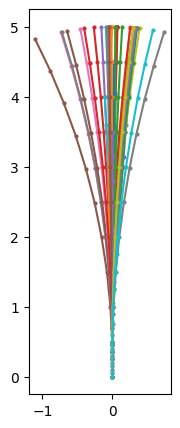

In [7]:
data.keys()  # 'traj_src', 'sample_pt'

import numpy as np  

data["traj_src"].shape


fix, ax = plt.subplots(1, 1, figsize=(10, 5))


traj_tokens = data["traj_src"][np.random.choice(len(data["traj_src"]), size=50, replace=False)]

for token_idx, token in enumerate(traj_tokens):
    # for timestep in token:
    ax.plot(
        token[:, 1], token[:, 0], marker="o", markersize=2, linestyle="-", color=TAB_10[token_idx % len(TAB_10)].hex
    )
ax.set_aspect("equal", adjustable="box")

In [8]:
data["traj_src"].shape

(1024, 11, 2)